In [1]:
# Lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import config
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import random
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [2]:
training_data = list(paths.list_images(config.TRAIN_PATH))
val_data = list(paths.list_images(config.VALIDATE_PATH))
testing_data = list(paths.list_images(config.TEST_PATH))
totalTrain = len(training_data)
totalVal = len(val_data)
totalTest = len(testing_data)
print("total: ",totalTest+totalTrain+totalVal," images")
print(f"Training data set : {totalTrain} images")
print(f"Valdating data set : {totalVal} images")
print(f"Testing data set : {totalTest} images")


total:  27558  images
Training data set : 19842 images
Valdating data set : 2204 images
Testing data set : 5512 images


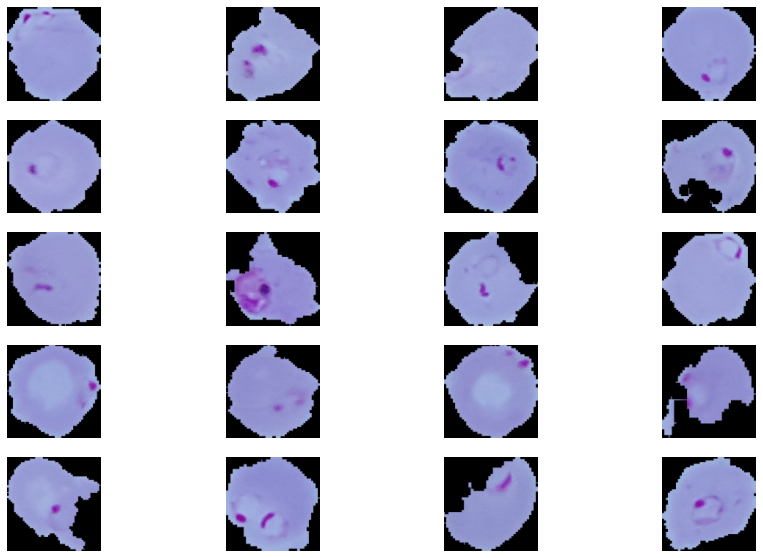

In [45]:
random.shuffle(list(paths.list_images(config.TRAIN_PATH)))
fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 5
for i in range(1, columns*rows +1):
    img = cv2.imread(training_data[i])
    img = cv2.resize(img, (128, 128))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)


In [3]:
trainAug = ImageDataGenerator(
	rescale=1 / 255.0,
	rotation_range=20,
	zoom_range=0.05,
	width_shift_range=0.05,
	height_shift_range=0.05,
	shear_range=0.05,
	horizontal_flip=True,
	fill_mode="nearest")


In [4]:
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=True,
	batch_size=config.BS)

Found 19842 images belonging to 2 classes.


In [5]:
valAug = ImageDataGenerator(rescale=1 / 255.0)

In [6]:
valGen = valAug.flow_from_directory(
	config.VALIDATE_PATH,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BS)

Found 2204 images belonging to 2 classes.


In [27]:
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BS)

Found 5512 images belonging to 2 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have 2 classes


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0

In [9]:
opt = SGD(learning_rate=config.INIT_LR, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [11]:
H = model.fit(
	x=trainGen,
	steps_per_epoch=totalTrain // config.BS,
	validation_data=valGen,
	validation_steps=totalVal // config.BS,
	epochs=config.NUM_EPOCHS,
	callbacks=callbacks
	)

Epoch 1/50
620/620 [==============================] - 476s 766ms/step - loss: 1.0324 - accuracy: 0.5838 - val_loss: 0.6696 - val_accuracy: 0.6163
Epoch 2/50
620/620 [==============================] - 141s 228ms/step - loss: 0.5516 - accuracy: 0.7242 - val_loss: 0.2438 - val_accuracy: 0.9196
Epoch 3/50
620/620 [==============================] - 142s 229ms/step - loss: 0.2310 - accuracy: 0.9224 - val_loss: 0.3583 - val_accuracy: 0.8741
Epoch 4/50
620/620 [==============================] - 154s 248ms/step - loss: 0.2020 - accuracy: 0.9356 - val_loss: 0.2433 - val_accuracy: 0.9200
Epoch 5/50
620/620 [==============================] - 133s 214ms/step - loss: 0.1915 - accuracy: 0.9418 - val_loss: 0.2032 - val_accuracy: 0.9324
Epoch 6/50
620/620 [==============================] - 142s 229ms/step - loss: 0.1741 - accuracy: 0.9457 - val_loss: 0.3130 - val_accuracy: 0.8847
Epoch 7/50
620/620 [==============================] - 137s 221ms/step - loss: 0.1713 - accuracy: 0.9466 - val_loss: 0.1732 -

In [16]:
model.save('model.h5')

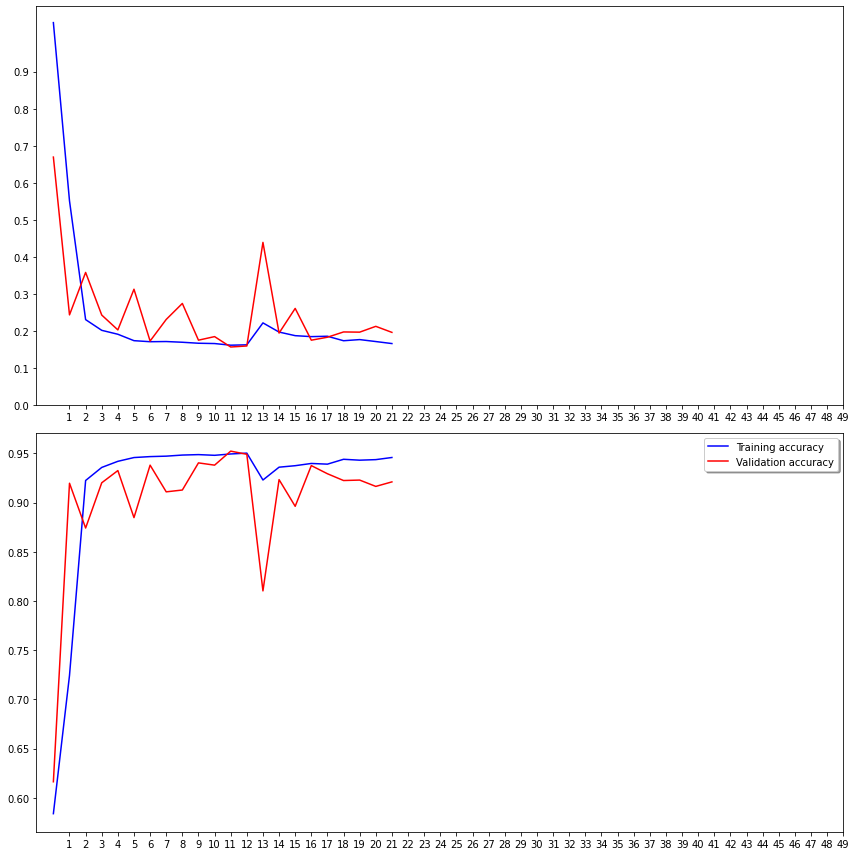

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(H.history['loss'], color='b', label="Training loss")
ax1.plot(H.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, config.NUM_EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(H.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(H.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, config.NUM_EPOCHS, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [42]:
predict = model.predict(testGen,verbose=1)
predicted_class_indices=np.argmax(predict,axis=1)
predicted_class_indices


173/173 [==============================] - 9s 53ms/step


array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [38]:
labels = (trainGen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions

['Parasitized',
 'Parasitized',
 'Parasitized',
 'Uninfected',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Uninfected',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Uninfected',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Uninfected',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Uninfected',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Uninfected',
 'Parasitized'

In [43]:
from sklearn.metrics import classification_report
test_labels= testGen.classes
test_labels

print(classification_report(test_labels, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2726
           1       0.88      0.99      0.93      2786

    accuracy                           0.93      5512
   macro avg       0.94      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512



In [39]:
test_accuracy = model.evaluate(testGen)
print('Testing Accuracy: {:.2f}%'.format(test_accuracy[1] * 100))

173/173 [==============================] - 9s 51ms/step - loss: 0.1833 - accuracy: 0.9287
Testing Accuracy: 92.87%
